# Data analysis in high dimensions:
# The Curse of Dimensionality

### In high-dimensional space, points tend to be far apart.

This impacts data analysis. Intuitively, clustering is difficult when points are scattered. This notebook will show why high-dimensional space is like this.

Think about the unit cube in $n$-dimensions. This is hard to visualize for $n>3$. The point of this code is to try to say something about this crazy, hard to visualize high-dimensional space thing. Algebraically, this is not too difficult to think about. It's just all the $n$-tuples of numbers between 0 and 1.

#### How big is the unit cube?

What is the length of the main-diagonal of the $n$-cube? In 2 dimensions, it's $\sqrt 2$ and in 3 dimensions it's $\sqrt 3$. In 100-dimensional space, the main diagonal is 10 units long. In 1M-dimensional space, the main diagonal is 1,000 units long. The 1M-dimensional unit cube has points that are pretty far apart from one another.

#### What percentage of the cube is in the ball?

Consider an n-dimensional ball inscribed in an n-dimensional cube.

In [1]:
from __future__ import print_function

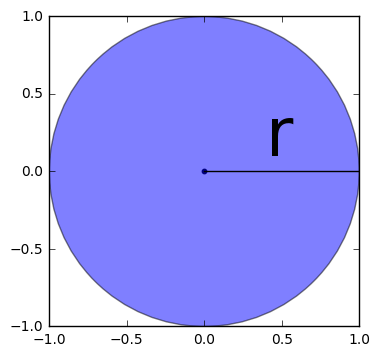

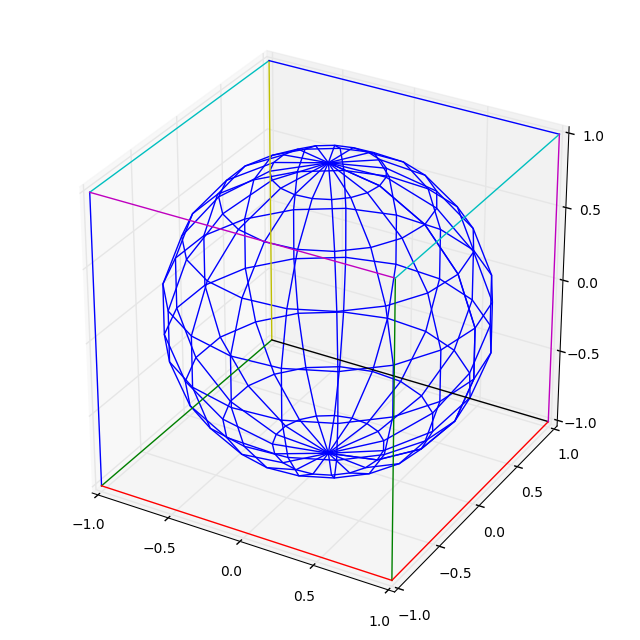

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def make_circle():
    fig = plt.gcf()
    ax = fig.add_subplot(111, aspect='equal')
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5))
    ax.scatter(0,0,s=10,color="black")
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black")
    ax.text(.4,.1,"r",size=48)
    ax.set_xlim(left=-1,right=1)
    ax.set_ylim(bottom=-1,top=1)
    plt.show()
    
    
make_circle()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e))

#draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="b")



In 2 dimensions: $\frac {\pi r^2} {(2r)^2} = \frac \pi 4$ ~ 79%

In 3 dimensions: $\frac {\frac 4 3 \pi r^3} {(2r)^3} = \frac \pi 6$ ~ 52%

What is the trend?

We can use a random variable drawn from a uniform distribution to estimate the percentage for $n$ dimensions.

Strategy: draw a bunch of random points in the cube (each dimension value between 0 and 1) and calculate the percentage within 1 unit from the origin. 

Run this experiment 100 times to estimate the error in the estimate.

Note: this is an example of a Monte Carlo simulation.

In [3]:
# how to draw a point?
print("random number:", np.random.sample())

# how to draw 5 points in 2 dimensions?
sample_data = np.random.sample((5,2))
print(sample_data)

random number: 0.635415852107976
[[ 0.75650437  0.71976793]
 [ 0.9633176   0.83142784]
 [ 0.35372062  0.48291043]
 [ 0.72849348  0.94303251]
 [ 0.85536065  0.48656917]]


In [4]:
# how far are these points from origin?
#print "distances: ",(sample_data**2).sum(1)
def norm(x): 
    # input: a bunch of points -- one vector per row
    # output: the distance from the origin to each point
    return np.sqrt( (x**2).sum(1) )
def in_the_ball(x): 
    # input: a bunch of points -- one vector per row
    # output: a boolean array -- if the point is in the ball
    return norm(x)<1

print(norm(sample_data))

[ 1.04420531  1.27249874  0.598599    1.19164301  0.9840688 ]


In [13]:
# A Monte Carlo with increasing dimensions..  
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean()
                     for iteration in range(100)])
    return data.mean(), data.min(), data.max()

dims = range(2,15)
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims)))


print(what_percent_of_the_ncube_is_in_the_nball(10))

(0.0024390000000000002, 0.0014, 0.0041999999999999997)


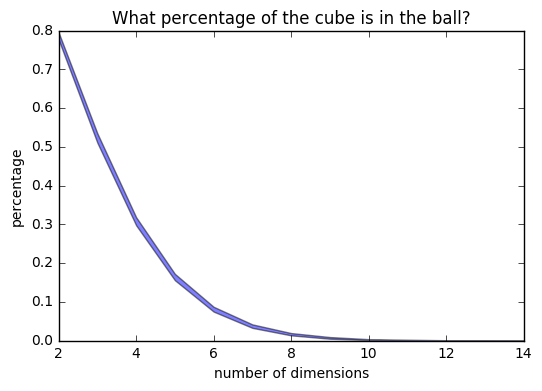

In [14]:
plt.fill_between(dims, data[:,1], data[:,2], facecolor='blue',alpha=.5)
plt.xlabel("number of dimensions")
plt.ylabel("percentage")
plt.title("What percentage of the cube is in the ball?")
plt.show()

So we see that most of the cube is not in the ball -- in high enough dimensions almost none of it is.

Why does this matter? If we were to try to cluster points in high-dimensional space or estimate density -- the more dimensions, the more difficult.

On average, points are much further apart in high dimensions.

Consider a bunch of points uniformly distributed in a $n$-dimensional unit cube. Suppose we'd like to obtain a kNN estimator for the center of the cube.

#### Let R be the distance from the center to the closest data point. How does R change with increasing dimensions?

In [17]:
def get_min_distance(dimension, sample_size=10**3):
    points = np.random.sample((sample_size,dimension))-.5   # centering our data.. 
    # returning the closest point. . 
    return np.min(norm(points))

def estimate_closest(dimension):
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()

dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

# test on a dimension.. 
print(estimate_closest(6))

(0.23330470968434466, 0.088326600709936323, 0.3262617304424224)


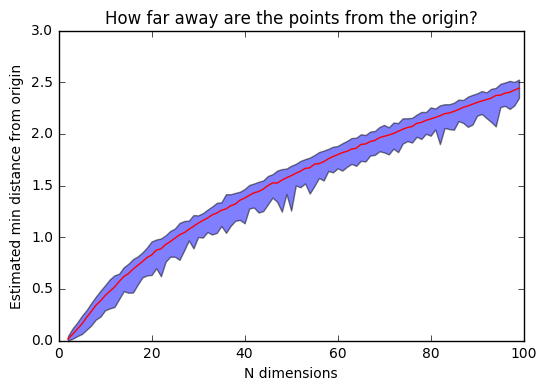

In [18]:
plt.plot(dims,min_distance_data[:,0], color='red')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("N dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away are the points from the origin?")

Not only does the main-diagonal of the cube get big, but most points are scattered about far away from the center. With 1,000 random points, the closest point is about 2 units away in 80 dimensions. In 2 and 3 dimensions -- there are always points within .1 from the origin.

What if we wanted to increase our sample so that points were as dense in high-dimensions as they are in lower-dimensions? We'd have to increase our sample size exponentially in the number of dimensions. That's a lot. It means that most of the time, with very high dimensional data sets the data is often very sparsely distributed.